In [1]:
import math
def minutes_distance(lat1,lat2,lon1,lon2):
    lat1=lat1*math.pi/180
    lat2=lat2*math.pi/180
    lon1=lon1*math.pi/180
    lon2=lon2*math.pi/180
    t1=math.sin((lat1-lat2)/2)**2
    t2=math.sin((lon1-lon2)/2)**2
    R=6371
    d=2*R*math.asin(math.sqrt(t1+t2*math.cos(lat1)*math.cos(lat2)))
    return round(d/5*60,2)



In [2]:
print(minutes_distance(44.8268096,44.8259171,20.4532741,20.455243))
#44.8268096,20.4532741
#44.8259171,20.455243

2.21


In [24]:
import pandas as pd
import pickle
with open("data_cleaned/day_routes",'rb') as file:
    dataDayRoutes=pickle.load(file)
with open("data_cleaned/routes", 'rb') as file:
    dataRoutes = pickle.load(file)
with open("data_cleaned/stops", 'rb') as file:
    dataStops = pickle.load(file)
with open("data_cleaned/trips", 'rb') as file:
    dataTrips = pickle.load(file)
with open("data_cleaned/stop_times", 'rb') as file:
    dataStopTimes = pickle.load(file)
with open("data_cleaned/stop_times2", 'rb') as file:
    dataStopTimes2 = pickle.load(file)
with open("data_cleaned/dataStopsExtra", 'rb') as file:
    dataStopsExtra = pickle.load(file)
with open("data_cleaned/dataStopsExtra", 'rb') as file:
    dataStopsExtra = pickle.load(file)
#dataRoutes=dataRoutes[dataRoutes['route_type']!=702]
print(dataDayRoutes)

     route_id route_short_name  \
0           2                2   
1           5                5   
2           6                6   
3           7                7   
4           9                9   
..        ...              ...   
168     20407             407L   
169     20505             505R   
170     20703            703L1   
171     40101             EKO1   
172     40102             EKO2   

                                       route_long_name  route_type  
0                    Unutrašnji Krug - Spoljašnji Krug           0  
1                  Kalemegdan /Donji Grad/ - Ustanička           0  
2                                Tašmajdan - Ustanička           0  
3                                  Ustanička - Blok 45           0  
4                                    Banjica - Blok 45           0  
..                                                 ...         ...  
168                     Bela Reka - Trebež (Okretnica)         702  
169                Miljakovac 1  - Milj

In [25]:
data=dataStopTimes2.merge(dataTrips)

data=data[['stop_id','stop_sequence','route_id','direction_id']]
data1=data[data['direction_id']==0]
data2=data[data['direction_id']==1]

data1=data1.groupby(['stop_id','stop_sequence','route_id'],as_index=False).first()
data1=data1.sort_values(by=['route_id','stop_sequence'])
data2=data2.groupby(['stop_id','stop_sequence','route_id'],as_index=False).first()
data2=data2.sort_values(by=['route_id','stop_sequence'])
dataStopSequences=pd.concat([data1, data2], sort=False)
dataDayRoutesMerge=dataDayRoutes['route_id']
dataStopSequences= dataStopSequences.merge(dataDayRoutesMerge)
Stops=dataStopSequences.groupby(['stop_id'],as_index=False).first()
Stops= Stops[['stop_id']]
print(Stops)
dayStops=Stops.merge(dataStops)
dayStops=dayStops.merge(dataStopsExtra)[['stop_id','stop_name','stop_lat','stop_lon','zone_id','tip','size']]
print(dayStops)
#print(dataStopSequences)
#dataDayStops=dataStopSequences.groupby('stop_id',as_index=False).first()
#dataDayStops= dataDayStops.merge()
#print(dataDayStops)

      stop_id
0           1
1           2
2           3
3           4
4           5
...       ...
3111     7941
3112     7942
3113     7968
3114     7969
3115     7970

[3116 rows x 1 columns]
      stop_id                   stop_name   stop_lat   stop_lon  zone_id  \
0           1     Kalemegdan (Donji Grad)  44.826810  20.453274        1   
1           2            Tadeuša Košćuška  44.825917  20.455243        1   
2           3            Tadeuša Košćuška  44.826253  20.454967        1   
3           4                  Kalemegdan  44.820329  20.453252        1   
4           5                  Kalemegdan  44.820884  20.454076        1   
...       ...                         ...        ...        ...      ...   
3111     7941                   Simić - R  44.626497  20.429264        3   
3112     7942                   Simić - R  44.626713  20.429340        3   
3113     7968  Stara Lipovica - Okretnica  44.613962  20.430680        3   
3114     7969                    Manastir  44.6

In [26]:
def belongToSet(s,newStop):
    
    for i in range(len(s)):
        minutes=minutes_distance(newStop['stop_lat'],s[i]['stop_lat'],newStop['stop_lon'],s[i]['stop_lon'])
        if (minutes>2.5):
            return False
    return True
    
            
    

In [27]:
superSet= list()
for i in range(dayStops.shape[0]):
    if (i%100==0):
        print(i)
    stop=dayStops.iloc[i]
    foundSet=False
    for s in superSet:
    
        if (belongToSet(s,stop)):
            s.append(stop)
            foundSet=True
            break
    if not foundSet:
        newList= list()
        newList.append(stop)
        superSet.append(newList)
        
#print(dataStops)


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100


In [28]:
import networkx as nx
G = nx.DiGraph()
data=dataStopsExtra[['stop_id','stop_name','stop_lat','stop_lon','zone_id','tip','size']]
#print(data)
#print(dataStops.groupby(['stop_id','stop_name']).
for i in range(0,data.shape[0]):
    if (data.iloc[i]['stop_id'] in dataStopSequences['stop_id'].values):
        G.add_node(data.iloc[i]['stop_id'],name=data.iloc[i]['stop_name'],lat=data.iloc[i]['stop_lat'],lon=data.iloc[i]['stop_lon'],zone=data.iloc[i]['zone_id'],tip=data.iloc[i]['tip'],departures=data.iloc[i]['size'])

for i in range(1,dataStopSequences.shape[0]):
    if (dataStopSequences.iloc[i]['stop_sequence']>dataStopSequences.iloc[i-1]['stop_sequence']):
        if((dataStopSequences.iloc[i-1]['stop_id'], dataStopSequences.iloc[i]['stop_id']) in G.edges):
            G.edges[dataStopSequences.iloc[i-1]['stop_id'], dataStopSequences.iloc[i]['stop_id']]['weight']+=1
        else:
            G.add_edge(dataStopSequences.iloc[i-1]['stop_id'], dataStopSequences.iloc[i]['stop_id'],weight=1)
cnt1=0
cnt2=0
for i in range(0,dataRoutes.shape[0]):
    mask0=(dataStopSequences['route_id']==dataRoutes.iloc[i]['route_id']) & (dataStopSequences['direction_id']==0)
    mask1=(dataStopSequences['route_id']==dataRoutes.iloc[i]['route_id']) & (dataStopSequences['direction_id']==1)
    data1=dataStopSequences[mask0]
   
   
    min0=data1.query('stop_sequence == stop_sequence.min()')['stop_id']
    min0=min0.to_string(index=False)
    max0=data1.query('stop_sequence == stop_sequence.max()')['stop_id']
    max0=max0.to_string(index=False)
   
   # print(data1.shape,max0)
    data2=dataStopSequences[mask1]
    
    min1=data2.query('stop_sequence == stop_sequence.min()')['stop_id']
    min1=min1.to_string(index=False)
    max1=data2.query('stop_sequence == stop_sequence.max()')['stop_id']
    max1=max1.to_string(index=False)

   # print(min0,min1,max0,max1)

    if (min0.isnumeric() and max1.isnumeric()and (int(min0)!=int(max1))):
        cnt1=cnt1+1
        # print('x')
        G.add_edge(int(max1),int(min0),weight=1)
    if (min1.isnumeric() and max0.isnumeric() and (int(min1)!=int(max0))):
        cnt2=cnt2+1
        #print('y')
        G.add_edge(int(max0),int(min1),weight=1)
print(G)

DiGraph with 3116 nodes and 3836 edges


In [29]:
data=G.degree()
data=list(data)
dataDict=dict(data)


In [30]:
import math
def mvp(s):
    max1=0
    maxIndex=-1
    cnt=0
    for stop in s:
        
        tmp=dataDict[int(stop['stop_id'])]
        if (tmp>max1):
            max1=tmp
            maxIndex=cnt
        cnt=cnt+1
                    
       
        
    return maxIndex
      
    

In [31]:
mvps= list()
for s in superSet:
    if (len(s)>1):
        mvps.append(s[mvp(s)])
    else:
        mvps.append(s[0])
print(mvps)

[stop_id                     2
stop_name    Tadeuša Košćuška
stop_lat            44.825917
stop_lon            20.455243
zone_id                     1
tip                tramvajska
size                      218
Name: 1, dtype: object, stop_id               4
stop_name    Kalemegdan
stop_lat      44.820329
stop_lon      20.453252
zone_id               1
tip          tramvajska
size                152
Name: 3, dtype: object, stop_id                6
stop_name    Pristanište
stop_lat       44.818662
stop_lon       20.449412
zone_id                1
tip           tramvajska
size                 258
Name: 5, dtype: object, stop_id               297
stop_name    Brankov Most
stop_lat        44.815355
stop_lon           20.452
zone_id                 1
tip              mesovita
size                  648
Name: 255, dtype: object, stop_id                      10
stop_name    Ekonomski Fakultet
stop_lat              44.810884
stop_lon              20.454124
zone_id                       1
tip   

In [85]:
data=dataStopSequences
for j in range(len(superSet)):
    s=superSet[j]
    for i in range(len(s)):
        data['stop_id'] = data['stop_id'].replace([s[i]['stop_id']], mvps[j]['stop_id'])
print(data)
dataStopSequences=data

      stop_id  stop_sequence  route_id  direction_id
0           6              1         2             0
1           4              2         2             0
2          71              3         2             0
3          73              4         2             0
4          52              5         2             0
...       ...            ...       ...           ...
8116      194             12     40102             1
8117       82             13     40102             1
8118        4             14     40102             1
8119     2111             15     40102             1
8120      529             16     40102             1

[8121 rows x 4 columns]


In [86]:
G2 = nx.DiGraph()
for i in range(len(mvps)):
    stop=mvps[i]
    size=0
    types= set()
    for stopic in superSet[i]:
        types.add(stopic['tip'])
        size=size+stopic['size']
    tip=stop['tip']
    if (len(types)>1):
        tip='mesovita'

    G2.add_node(stop['stop_id'],name=stop['stop_name'],lat=stop['stop_lat'],lon=stop['stop_lon'],zone=stop['zone_id'],tip=tip,departures=size)
    
print(G2)

DiGraph with 1461 nodes and 0 edges


In [87]:
for i in range(1,dataStopSequences.shape[0]):
    if (dataStopSequences.iloc[i]['stop_sequence']>dataStopSequences.iloc[i-1]['stop_sequence']):
        if((dataStopSequences.iloc[i-1]['stop_id'], dataStopSequences.iloc[i]['stop_id']) in G2.edges):
            G2.edges[dataStopSequences.iloc[i-1]['stop_id'], dataStopSequences.iloc[i]['stop_id']]['weight']+=1
        else:
            G2.add_edge(dataStopSequences.iloc[i-1]['stop_id'], dataStopSequences.iloc[i]['stop_id'],weight=1)
cnt1=0
cnt2=0
for i in range(0,dataRoutes.shape[0]):
    mask0=(dataStopSequences['route_id']==dataRoutes.iloc[i]['route_id']) & (dataStopSequences['direction_id']==0)
    mask1=(dataStopSequences['route_id']==dataRoutes.iloc[i]['route_id']) & (dataStopSequences['direction_id']==1)
    data1=dataStopSequences[mask0]
   
   
    min0=data1.query('stop_sequence == stop_sequence.min()')['stop_id']
    min0=min0.to_string(index=False)
    max0=data1.query('stop_sequence == stop_sequence.max()')['stop_id']
    max0=max0.to_string(index=False)
   
   # print(data1.shape,max0)
    data2=dataStopSequences[mask1]
    
    min1=data2.query('stop_sequence == stop_sequence.min()')['stop_id']
    min1=min1.to_string(index=False)
    max1=data2.query('stop_sequence == stop_sequence.max()')['stop_id']
    max1=max1.to_string(index=False)

   # print(min0,min1,max0,max1)

    if (min0.isnumeric() and max1.isnumeric()and (int(min0)!=int(max1))):
        cnt1=cnt1+1
        # print('x')
        G2.add_edge(int(max1),int(min0),weight=1)
    if (min1.isnumeric() and max0.isnumeric() and (int(min1)!=int(max0))):
        cnt2=cnt2+1
        #print('y')
        G2.add_edge(int(max0),int(min1),weight=1)
print(G2)

DiGraph with 1461 nodes and 3330 edges


In [88]:
G2.remove_edges_from(nx.selfloop_edges(G2))
print(nx.number_of_selfloops(G2))

0


In [89]:

print(G2)

DiGraph with 1461 nodes and 3257 edges


In [152]:
output_path = 'models/directed_lWalk_graph.gexf'

nx.write_gexf(G2, output_path)

In [70]:
input_path='models/directed_lWalk_graph.gexf'
G2=nx.read_gexf( input_path)

In [73]:
#Gustina dijametar prosecna radaljina
print(nx.density(G2))
diameter = max([max(j.values()) for (i,j) in nx.shortest_path_length(G2)])
print(diameter)
print(nx.average_shortest_path_length(G2))

0.0015269143859056942
104
26.3609031157117


In [136]:
#broj komponenti broj grana koje je potrebno oduzeti da ne bi bio povezan, sigma koeficijen da li je mali svet ako je vece od 1
print(nx.number_weakly_connected_components(G2)) #1
print(nx.number_strongly_connected_components(G2)) #1
print(nx.edge_connectivity(G2)) #1

1
1
1


In [135]:
pd.set_option('display.max_rows', 10)
#KLASTERIZACIJA
n = G2.number_of_nodes()
m = G2.number_of_edges()
Gnm = nx.gnm_random_graph(n, m) 
p = ( 2*float(m) ) / ( n* (n-1) )
print(p)

er_mreza = nx.erdos_renyi_graph(n,p)

delta_m = m - er_mreza.number_of_edges()
print(f"Broj čvorova originalne mreže minus broj čvorova u ER mreži iznosi {delta_m}, što je odstupanje od {abs(float(delta_m)) * 100 / m}%")

print('PModel')
id_stanice, clustering_coef = zip(*nx.clustering(G2, weight = "weight").items())

nenula = [(id_s, cc)  for id_s, cc in zip(id_stanice, clustering_coef) if cc > 0]

df = pd.DataFrame(nenula, columns = ["id", "cc"])
df.sort_values('cc', inplace = True)

max_lokalni_stepen_klasterisanja = max(clustering_coef)

prosecni_stepen_klasterisanja = nx.average_clustering(G2,weight = "weight")

print(f"Max lokalni cc: {max_lokalni_stepen_klasterisanja}")
print(f"Prosečan cc: {prosecni_stepen_klasterisanja}")
print("Lokalni stepeni klasterisanja koji nisu nula:")
print(df)

print('GNMModel')
id_stanice, clustering_coef = zip(*nx.clustering(Gnm, weight = "weight").items())

nenula = [(id_s, cc)  for id_s, cc in zip(id_stanice, clustering_coef) if cc > 0]

df = pd.DataFrame(nenula, columns = ["id", "cc"])
df.sort_values('cc', inplace = True)

max_lokalni_stepen_klasterisanja = max(clustering_coef)

prosecni_stepen_klasterisanja = nx.average_clustering(Gnm)

print(f"Max lokalni cc: {max_lokalni_stepen_klasterisanja}")
print(f"Prosečan cc: {prosecni_stepen_klasterisanja}")
print("Lokalni stepeni klasterisanja koji nisu nula:")
print(df)
print('ERModel')
id_stanice, clustering_coef = zip(*nx.clustering(er_mreza, weight = "weight").items())

nenula = [(id_s, cc)  for id_s, cc in zip(id_stanice, clustering_coef) if cc > 0]

df = pd.DataFrame(nenula, columns = ["id", "cc"])
df.sort_values('cc', inplace = True)

max_lokalni_stepen_klasterisanja = max(clustering_coef)

prosecni_stepen_klasterisanja = nx.average_clustering(er_mreza)

print(f"Max lokalni cc: {max_lokalni_stepen_klasterisanja}")
print(f"Prosečan cc: {prosecni_stepen_klasterisanja}")
print("Lokalni stepeni klasterisanja koji nisu nula:")
print(df)


0.0030538287718113884
Broj čvorova originalne mreže minus broj čvorova u ER mreži iznosi 13, što je odstupanje od 0.39914031317163035%
PModel
Max lokalni cc: 0.2693043362539855
Prosečan cc: 0.010229058761516977
Lokalni stepeni klasterisanja koji nisu nula:
       id        cc
58    202  0.001670
157   606  0.002404
302  1752  0.002404
295  1634  0.002404
325  2166  0.002404
..    ...       ...
293  1609  0.228707
127   423  0.245648
289  1579  0.250000
109   377  0.269304
313  1996  0.269304

[418 rows x 2 columns]
GNMModel
Max lokalni cc: 0.3333333333333333
Prosečan cc: 0.0032733712405170305
Lokalni stepeni klasterisanja koji nisu nula:
      id        cc
46  1435  0.018182
36  1093  0.018182
45  1399  0.022222
31  1055  0.022222
6    147  0.022222
..   ...       ...
42  1256  0.200000
18   507  0.333333
29  1037  0.333333
7    162  0.333333
47  1457  0.333333

[48 rows x 2 columns]
ERModel
Max lokalni cc: 0.3333333333333333
Prosečan cc: 0.0028274334229159686
Lokalni stepeni klasteris

In [143]:
rich=nx.rich_club_coefficient(G2.to_undirected(), normalized=True, Q=60, seed=None)
print(rich)



ZeroDivisionError: float division by zero

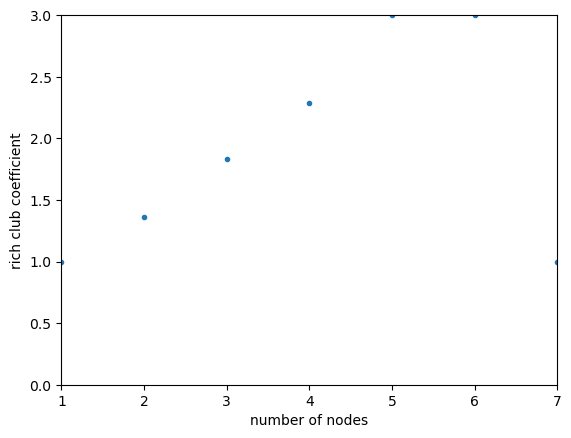

In [172]:
import matplotlib.pyplot as plt
x, y = zip(*rich.items())                                                      

plt.figure(1)   

    # prep axes   
plt.xlabel('number of nodes')                                                                                                             
plt.xscale('linear')                                                                                                                
plt.xlim(1, max(x))  

plt.ylabel('rich club coefficient')                                                                                                          
plt.yscale('linear')                                                                                                                
plt.ylim(0, max(y))                                                                                                             
                                                                                                                                                                                                    
plt.scatter(x, y, marker='.')                                                                                                    
plt.show()

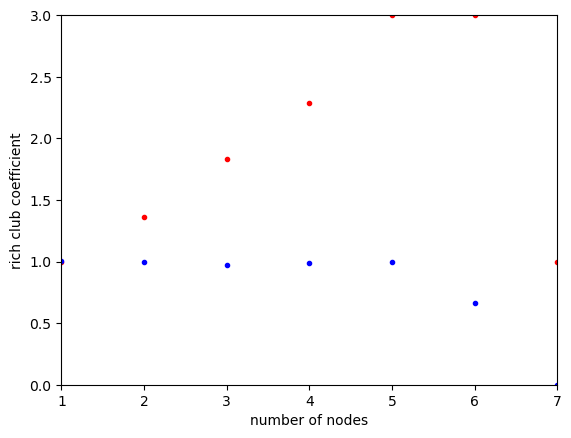

In [181]:
rich2=nx.rich_club_coefficient(er_mreza,normalized=True,Q=60,seed=None)
x, y = zip(*rich.items())                                                      
x1,y1=zip(*rich2.items())
plt.figure(1)   

    # prep axes   
plt.xlabel('number of nodes')                                                                                                             
plt.xscale('linear')                                                                                                                
plt.xlim(1, max(x))  

plt.ylabel('rich club coefficient')                                                                                                          
plt.yscale('linear')                                                                                                                
plt.ylim(0, max(y))                                                                                                             
                                                                                                                                                                                                    
plt.scatter(x, y, marker='.',color='r')    
plt.scatter(x1, y1, marker='.',color='b')                                                                                                      
plt.show()

In [133]:
#Asortativnost
#netezinska
r1 = nx.degree_assortativity_coefficient(G2)
print(f"Koeficijent asortativnosti na osnovu netežinskog stepena čvora: {r1}")

# asortativnost na osnovu težinskog stepena čvora
r2 = nx.degree_assortativity_coefficient(G2, weight='weight')
print(f"Koeficijent asortativnosti na osnovu težinskog stepena čvora: {r2}")

Koeficijent asortativnosti na osnovu netežinskog stepena čvora: 0.304793082992555
Koeficijent asortativnosti na osnovu težinskog stepena čvora: 0.5293585424849202


Text(0.5, 1.0, 'IWalkModel')

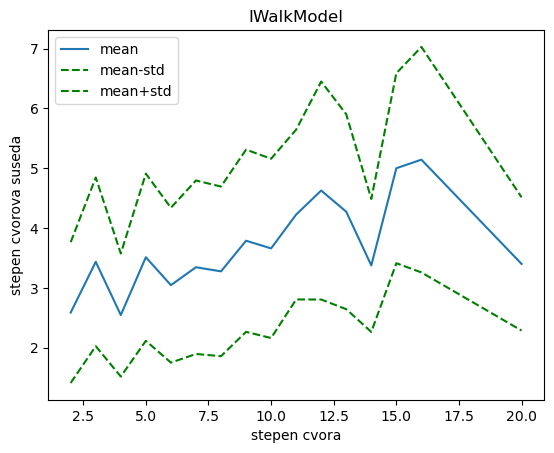

In [132]:
import numpy as np
dict_degree = {}
for node in G2.nodes():
    
    w = G2.degree(nbunch= node)
    G2.neighbors(node)
    for neigh_node in G2.neighbors(node):
        if w in dict_degree:
            dict_degree[w].append(G.degree(neigh_node))
        else:
            dict_degree[w] = [G.degree(neigh_node)]

d = []
for k in dict_degree:
    m = np.array(dict_degree[k]).mean()
    s = np.array(dict_degree[k]).std()
    d.append([k, m, s])
d = np.array(d)

index = np.argsort(d[:, 0])
d[:, 0] = d[index, 0]
d[:, 1] = d[index, 1]
d[:, 2] = d[index, 2]

plt.plot(d[:, 0], d[:, 1], label='mean')
plt.plot(d[:, 0], d[:, 1] - d[:, 2], linestyle='--', color='g', label = 'mean-std')
plt.plot(d[:, 0], d[:, 1] + d[:, 2], linestyle='--', color = 'g', label='mean+std')
plt.legend()
plt.xlabel('stepen cvora')
plt.ylabel('stepen cvorova suseda')
plt.title('IWalkModel')

In [129]:
#funkcija za iscrtavanje grafa raspodele cvorova po stepenu
def plot_deg_frequency(G, weighted = False, xscale = "log", yscale = "log"):

    if weighted:
        degrees = G.degree(weight="weight")
    else:
        degrees = G.degree()
        
    _, deg_list = zip(*degrees)
    deg_counts = Counter(deg_list)        
    print(deg_counts)
    x, y = zip(*deg_counts.items())                                                      

    plt.figure(1)   

    # prep axes   
    if weighted:
        plt.xlabel('weighted degree')  
    else:
        plt.xlabel('degree')                                                                                                             
    plt.xscale(xscale)                                                                                                                
    plt.xlim(1, max(x))  

    plt.ylabel('frequency')                                                                                                          
    plt.yscale(yscale)                                                                                                                
    plt.ylim(1, max(y))                                                                                                             
                                                                                                                                                                                                    
    plt.scatter(x, y, marker='.')                                                                                                    
    plt.show()

Counter({4: 806, 2: 233, 6: 139, 5: 81, 8: 52, 3: 40, 7: 33, 9: 27, 10: 20, 11: 11, 12: 10, 13: 3, 15: 3, 16: 1, 14: 1, 20: 1})


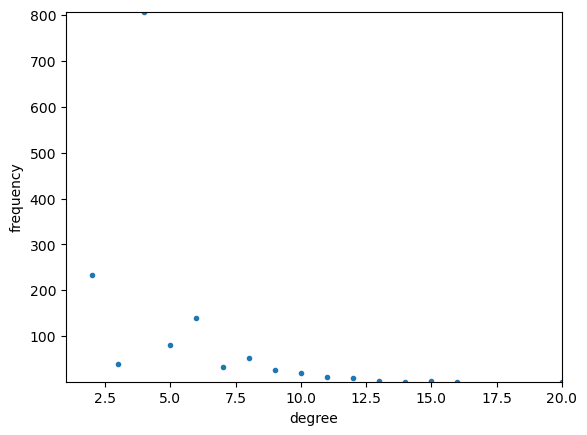

In [130]:
from collections import Counter
from operator import itemgetter
plot_deg_frequency(G2,xscale='linear', yscale='linear')

Counter({4: 488, 8: 241, 2: 163, 12: 113, 16: 82, 6: 59, 24: 44, 20: 43, 10: 39, 28: 28, 14: 28, 32: 23, 26: 14, 34: 12, 18: 12, 30: 12, 40: 11, 22: 8, 42: 7, 36: 6, 38: 5, 50: 4, 52: 3, 60: 3, 46: 3, 48: 2, 72: 1, 56: 1, 76: 1, 44: 1, 68: 1, 62: 1, 7: 1, 5: 1})


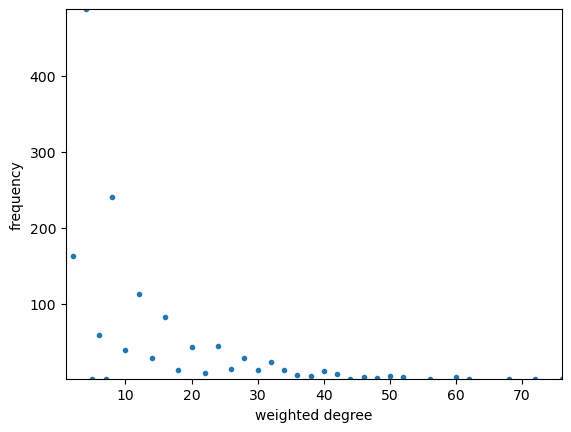

In [131]:
plot_deg_frequency(G2,weighted=True,xscale='linear',yscale='linear')

In [154]:
#funkcija za izracunavanje centralnosti
def calculate_centralities(G):
  
    IDC_dict = nx.in_degree_centrality(G)
    ODC_dict= nx.out_degree_centrality(G)
    CC_dict = nx.closeness_centrality(G)
    BC_dict = nx.betweenness_centrality(G)
    EVC_dict = nx.eigenvector_centrality(G,max_iter=500,weight='weight')
    DC_dict= nx.degree_centrality(G)
    df0=  pd.DataFrame.from_dict(IDC_dict, orient='index', columns=['IDC'])
    df1 = pd.DataFrame.from_dict(ODC_dict, orient='index', columns=['ODC'])
    df2 = pd.DataFrame.from_dict(CC_dict, orient='index', columns=['CC'])
    df3 = pd.DataFrame.from_dict(BC_dict, orient='index', columns=['BC'])
    df4 = pd.DataFrame.from_dict(EVC_dict, orient='index', columns=['EVC'])
    df5=pd.DataFrame.from_dict(DC_dict, orient='index', columns=['DC'])
    df = pd.concat([df0,df1, df2, df3, df4,df5], axis=1)
 
    #df['stop_id'] = data.index
    df=df.reset_index()
    df=df.rename(columns = {'index':'stop_id'})
    df= df.merge(dataStops)
    df= df[['stop_id','stop_name','IDC','ODC','CC','BC','EVC','DC']]
    return df

In [155]:
#Tabela sa informacijama o centralnosti cvorova
data=calculate_centralities(G2)

print(data['IDC'])

0       0.002055
1       0.002740
2       0.001370
3       0.004110
4       0.003425
          ...   
1456    0.001370
1457    0.001370
1458    0.001370
1459    0.000685
1460    0.001370
Name: IDC, Length: 1461, dtype: float64


In [98]:
import scipy.stats as stats
print(data['IDC'])
labele = ['IDC','ODC', 'CC', 'BC', 'EVC','DC']
cross_correlation_matrix = pd.DataFrame(columns = ['IDC','ODC', 'CC', 'BC', 'EVC','DC'], index = ['IDC','ODC', 'CC', 'BC', 'EVC','DC'])
p_val_matrix = pd.DataFrame(columns = ['IDC','ODC', 'CC', 'BC', 'EVC','DC'], index = ['IDC','ODC', 'CC', 'BC', 'EVC','DC'])

for ind in labele:
    for col in labele:
        cross_correlation_matrix[ind][col], p_val_matrix[ind][col] =  stats.kendalltau(data[ind], data[col])
        
print(cross_correlation_matrix)

0       0.000321
1       0.000321
2       0.000642
3       0.000642
4       0.000321
          ...   
3111    0.000321
3112    0.000321
3113    0.000321
3114    0.000321
3115    0.000321
Name: IDC, Length: 3116, dtype: float64
          IDC       ODC        CC        BC       EVC        DC
IDC       1.0  0.296061  0.285317  0.221228  0.256972  0.754227
ODC  0.296061       1.0  0.242047  0.209736  0.256055  0.753036
CC   0.285317  0.242047       1.0 -0.006523  0.729135  0.317766
BC   0.221228  0.209736 -0.006523       1.0 -0.012048  0.245641
EVC  0.256972  0.256055  0.729135 -0.012048       1.0  0.317407
DC   0.754227  0.753036  0.317766  0.245641  0.317407       1.0


In [157]:
pd.options.display.max_columns = None
pd.options.display.max_rows = 10
#display(data)
df_ = data
for metric in labele:
    df_[f"{metric}_rank"] = data[f"{metric}"].rank(ascending=False) 
    
df_['composite_rank'] = df_['ODC_rank']**2  * df_['CC_rank'] * df_['BC_rank']**2 *df_['EVC_rank'] *df_['DC_rank']



df_.sort_values(['composite_rank'], ascending = True,inplace=True)
df_.sort_values(['BC'], ascending = False,inplace=True)
#df_.sort_values(['CC'], ascending = False, inplace=True)

display(df_)

,stop_id,stop_name,IDC,ODC,CC,BC,EVC,DC,IDC_rank,ODC_rank,CC_rank,BC_rank,EVC_rank,DC_rank,composite_rank
7,496,Sajam,0.006164,0.004795,0.064496,0.304940,3.427515e-02,0.010959,2.0,8.0,2.0,1.0,25.0,2.0,6.400000e+03
755,1652,Čukarica,0.004795,0.003425,0.063176,0.252444,1.320087e-02,0.008219,5.5,44.5,5.0,2.0,59.0,14.5,3.388208e+07
128,1049,Zeleni Venac,0.004110,0.004795,0.058505,0.215044,2.793420e-01,0.008904,16.5,8.0,48.0,3.0,5.0,8.0,1.105920e+06
6,493,Mostar,0.004795,0.005479,0.064713,0.205019,3.267496e-02,0.010274,5.5,3.5,1.0,4.0,29.0,4.0,2.273600e+04
190,1152,Zemun /Gornji Grad/,0.006849,0.006849,0.051689,0.201991,4.486428e-05,0.013699,1.0,1.0,249.0,5.0,273.0,1.0,1.699425e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,2720,Naselje Stepa Stepanović,0.000685,0.000685,0.040409,0.000000,6.840190e-11,0.001370,1334.0,1335.5,777.0,1421.0,797.0,1345.0,2.999698e+21
238,544,Internacionalnih Brigada,0.000685,0.000685,0.052347,0.000000,1.347971e-04,0.001370,1334.0,1335.5,232.0,1421.0,231.5,1345.0,2.601580e+20
1047,2269,Okretnica /Česma/,0.000685,0.000685,0.042675,0.000000,2.692032e-12,0.001370,1334.0,1335.5,674.0,1421.0,903.0,1345.0,2.948125e+21
1220,2641,Mate Miloševića,0.000685,0.000685,0.041906,0.000000,9.859153e-12,0.001370,1334.0,1335.5,698.0,1421.0,865.5,1345.0,2.926313e+21


In [100]:
#%pip install python-docx
import docx
import pandas as pd
#Ispis df-ova u dockx
# i am not sure how you are getting your data, but you said it is a
# pandas data frame
def df_toDocx(output,data):
    


    # open an existing document
    doc = docx.Document()

    # add a table to the end and create a reference variable
    # extra row is so we can add the header row
    t = doc.add_table(data.shape[0]+1, data.shape[1])

    # add the header rows.
    for j in range(data.shape[-1]):
        t.cell(0,j).text = data.columns[j]

# add the rest of the data frame
    for i in range(data.shape[0]):
        for j in range(data.shape[-1]):
            t.cell(i+1,j).text = str(data.values[i,j])

# save the doc
    print(doc)
    doc.save(output)

In [158]:
df_.sort_values(['BC'], ascending = False,inplace=True)
df_toDocx('./docks/LWALK_BC_centrality.docx',df_.head(100))
#df_.sort_values(['CC'], ascending = False,inplace=True)

#df_toDocx('./docks/LWALK_CC_centrality.docx',df_.head(100))
#df_.sort_values(['DC'], ascending = False,inplace=True)
#df_toDocx('./docks/LWALK_DC_centrality.docx',df_.head(100))
#df_.sort_values(['EVC'], ascending = False,inplace=True)
#df_toDocx('./docks/LWALK_EVC_centrality.docx',df_.head(100))


In [103]:
df_toDocx('./docks/LWALK_Composite_centrality.docx',df_.head(100))

Calculating best minimal value for power law fit
7.228255951936153%
8.0
0.5483673597710147
Loglikelihood ratio: 4.844145023563883
Statistical significance: 0.02483747586441691
Loglikelihood ratio: 2.5574414053153305e-07
Statistical significance: 0.9994293657059539


Assuming nested distributions


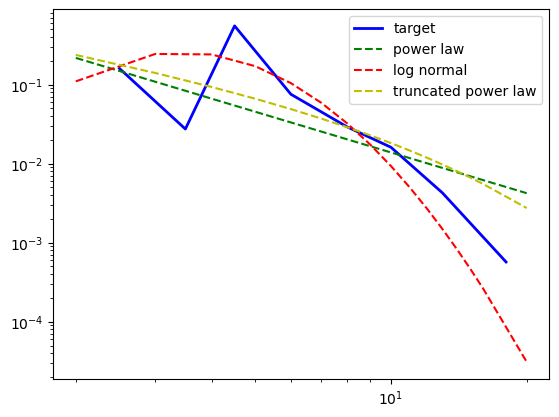

In [151]:
#%pip install powerlaw
import matplotlib.pyplot as plt
import powerlaw
degree_sequence = sorted([d for n, d in G2.degree()], reverse=True)
results = powerlaw.Fit(degree_sequence)

fit=powerlaw.Fit(degree_sequence,xmin=1)
fig2 = fit.plot_pdf(color='b', linewidth=2, label='target')
fit.power_law.plot_pdf(color='g', linestyle='--', ax=fig2, label='power law')
fit.lognormal.plot_pdf(color='r', linestyle='--', ax=fig2, label='log normal')
fit.truncated_power_law.plot_pdf(color='y', linestyle='--', ax=fig2, label='truncated power law')
fig2.legend()
#plt.xlabel('stepen cvora')
#plt.ylabel('broj cvorova')
print(results.power_law.alpha)
print(results.power_law.xmin)
print(results.power_law.sigma)
R, p = results.distribution_compare('power_law', 'exponential')
print(f"Loglikelihood ratio: {R}")
print(f"Statistical significance: {p}")
R, p = results.distribution_compare('power_law', 'truncated_power_law')
print(f"Loglikelihood ratio: {R}")
print(f"Statistical significance: {p}")

#fit.power_law.plot_pdf( color= 'b',linestyle='--',label='fit ccdf')
##fit.plot_pdf( color= 'b')
#plt.figure(figsize=(10, 6))
#fig2 = fit.plot_pdf(color='b', linewidth=2)
#fit.power_law.plot_pdf(color='g', linestyle='--', ax=fig2)
#fit.distribution_compare('power_law', 'lognormal')
##fig4 = fit.plot_ccdf(linewidth=3, color='black')
#fit.power_law.plot_ccdf(ax=fig4, color='r', linestyle='--') #powerlaw
#fit.lognormal.plot_ccdf(ax=fig4, color='g', linestyle='--') #lognormal
#fit.stretched_exponential.plot_ccdf(ax=fig4, color='b', linestyle='--')


In [155]:

print(nx.number_weakly_connected_components(G2))
print(nx.number_strongly_connected_components(G2))

1
1


In [45]:
k = 0
for stop in dayStops:
    print(stop)
    k += 1
    if k==3: break

stop_id
stop_lat
stop_lon


In [144]:
import math
def distance(lat1,lat2,lon1,lon2):
    lat1=lat1*math.pi/180
    lat2=lat2*math.pi/180
    lon1=lon1*math.pi/180
    lon2=lon2*math.pi/180
    t1=math.sin((lat1-lat2)/2)**2
    t2=math.sin((lon1-lon2)/2)**2
    R=6371
    d=2*R*math.asin(math.sqrt(t1+t2*math.cos(lat1)*math.cos(lat2)))
    return d 

In [145]:
def similarity(i,j):
    tip1=G2.nodes[i]['tip'] 
    tip2=G2.nodes[j]['tip']
    lat1=G2.nodes[i]['lat']
    lat2=G2.nodes[j]['lat']
    lon1=G2.nodes[i]['lon']
    lon2=G2.nodes[j]['lon']
    weight=1
    if (G2.has_edge(i,j)):
            weight= G2.edges[i,j]['weight']
    dist= distance(lat1,lat2,lon1,lon2)
    tipRank=1
   
    if (tip1=='tramvajska' and tip1==tip2):
        tipRank=4
    if (tip2=='trolejbuska' and tip1==tip2):
        tipRank=2
    if (tip1=='mesovita' and (tip1==tip2 or tip2=='tramvajska')):
        tipRank=1.5
   
    if dist < 0.1:
        distRank=10
    elif dist<0.5:
        distRank=8
    elif dist<1:
        distRank=6
    elif dist<1.5:
        distRank=5
    elif dist<2:
        distRank=4
    elif dist<3:
        distRank=3
    elif dist<5:
        distRank=2
    elif dist<10:
        distRank=1.5
    else:
        distRank=1
    #ret=1/dist*math.sqrt(dist)*tipRank*(weight**2)
    #distRank = np.exp(-dist**2/(2))
    ret = distRank*tipRank*weight
    return ret 

In [146]:
import numpy as np
for (x,y) in G2.edges():
    G2.edges[x,y]['rank']=similarity(x,y)
#Laplasijan matrica
L = nx.laplacian_matrix(G2.to_undirected(),weight='rank').toarray()
#pronalazenje sopstevnih vrednosit i sopstvenih vektora
l, v = np.linalg.eig(L)

<class 'networkx.utils.decorators.argmap'> compilation 87:4: FutureWarning: laplacian_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.


In [147]:
#v = np.real(v)
#l = np.real(l)
x_axis = np.arange(l.shape[0])+1

sort = np.argsort(l)
l = l[sort]
v = v[:, sort]

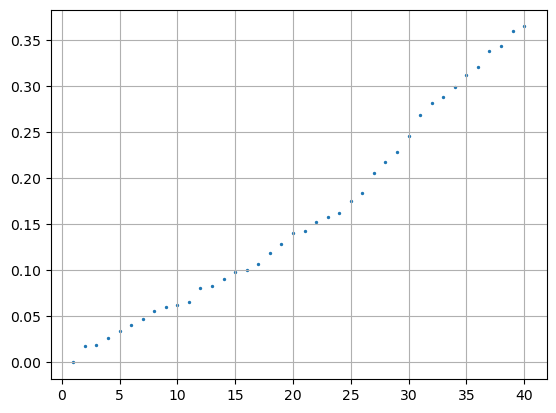

In [153]:
import matplotlib.pyplot as plt
plt.grid('on')
plt.scatter(x_axis[:40], l[:40],s = 2)

In [149]:
k = 11
vk = v[:,:k]
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=k).fit(vk)
nodes= list(G2.nodes)
for i in range(len(kmeans.labels_)):
              G2.nodes[nodes[i]]['spektralniKlaster']=kmeans.labels_[i]
